In [1]:
using MathTeXEngine, CairoMakie, LinearAlgebra
using StaticArrays

# Computational Physics: Homework 9
## The magnetic field of a current loop: Part 2
Due: **Tuesday 19 Mar 2024  before 9am**

<hr style="border-top: 1px solid purple; margin-top: 1px; border: 1px solid red"></hr>

## General task on this assignment
Your goal in this assignment is to further test the code you wrote in HW08 and to and to reate a 
 [streamplot](https://beautiful.makie.org/examples/2d/streamplot/streamplot) of the magnetic field.
General guidelines:<br>

a. Always use markdown cells to explain your thinking.</br>
b. If I ask for **a function**, create **one** function which accomplishes what I asked. </br>
c. Make sure to test each function you compose; in this assignment, I will ask lead you through this process.</br>
d. When you are finished, and before submitting the assignment, make sure to restart the kernel and run all cells to insure everything works.<br>

As in HW08, the current loop is assumed to lie in the $xy$ plane with the coordinate origin placed at the center of the loop (which has radius R, and carries current I as shown below. Keep in mind that in this problem, we are **not** evaluating the field on the z-axis (although your code should work in that case), but at some general point at $\mathbf{r_p} = [x,y,z]$. The geometry is shown below; in the figure, $\vec{r}^{\prime}$ points from the origin to the small chunk of *source current*, and $\vec{r}$ points from the *source* to the *field point*.

We'll use the `B_fast()` code from my HW08 solutions so we're all working with the same code. 

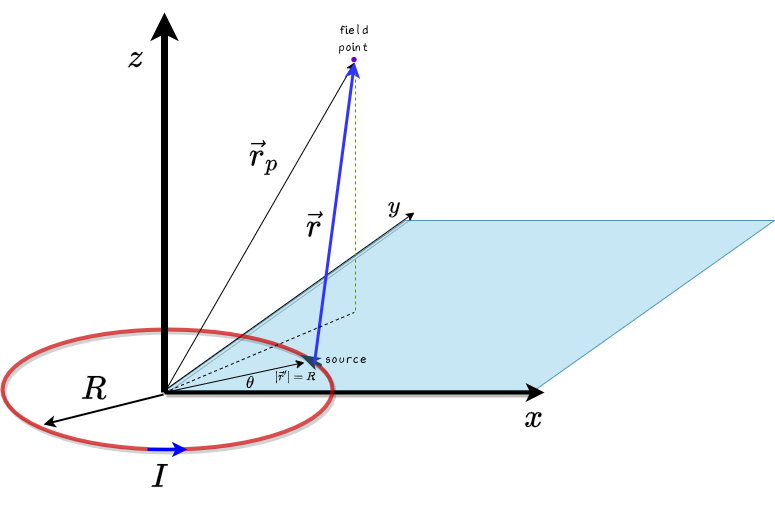

## Part 1: Further testing of the code from HW08
To start with, we'll use the souped-up version of the function to compute the magnetic field below:

In [1]:
"""
    B_fast(rₚ; N=300, I=1.0, R=1.0)

    Computes the magnetic field at some point in space (x,y,z) 
    created by a loop of current, I, with radius R centered 
    on the origin and in the xy plane.

    Inputs:
        rₚ : a vector composed of the cartesian coordinate of a point in space

        optional: N = 300 # the number of integration steps around the source current loop
                  I = 1.0 # the current in amps
                  R = 1.0 # the current loop's radius in meters

    Returns:
        B  :  the magnetic field vector (in nano Tesla) at the given point in space

"""
function B_fast(rₚ; N=300, I=1.0, R=1.0)
    μₒ = 4π*1e-7
    Δθ = 2π/N
    B = SVector{3, Float64}([0.0, 0.0, 0.0])
    for θ in 0:Δθ:2π-Δθ
            Idl = SVector{3, Float64}([-sin(θ), cos(θ), 0])
            r = SVector{3, Float64}([-R*cos(θ), -R*sin(θ), 0]) .- SVector{3, Float64}(rₚ)
            dB = cross(Idl, r)/(norm(r)^3)
            B = B .+ dB
    end
    B = 1.0e9 * (μₒ/(4π)) * I*R*Δθ * B # convert from T to nT
    return B
end    

B_fast

## B-field along the x-axis
Using the function `B_fast(rₚ; N=300, I=1.0, R=1.0)`, write some code to do the following:</br>

i) Compute the magnetic field along the x-axis from -3 to +3. </br>
ii) Plot the magnetic field strength for $x\in[-3,+3]$</br>

Follow the following steps to implement (i) and (ii):

### Enrico Fermi's admonition
Enrico Fermi was a brilliant Nobel Prize winning theoretical and experimental physicist (an unusual combination), who, among other things, is knows for advocating "back of the envelope calculations". The idea is that even on a scrap of paper, with a pen in hand, you should be able to estimate almost anything on the space provided. He felt that a good scientist should know roughly what to expect before conducting an experiment. 
So, before starting to compute the magnetic field along the x-axis, I want you to tell me what you expect to find, both in magnitude and direction. 

In the markdown cell below, explain to me </br>
a)  What direction the magnetic field will be on the x-axis; be sure to include the direction inside and outside the ring.</br>
b)  What can you tell me qualitatively about the magnitude of the magnetic field along the domain  $x\in[-3,+3]$? Since it's not easy to draw a picture in the notebook, describe to me in words what you expect to see.</br>


### Now plot the field along the x-axis. 
You should, as always, explain your thinking process as you go! I want to see markdown cell followed by code, followed by markdown cell, then code, etc...your job is to lead me through your thinking process. There are likely several methods to work this out; it's relativey straightforward to use `B_fast()` to compute the magnetic field along the x-axis, but the challenge is extracting the relevant info to plot the field. 

## Part 2: Visualizing the magnetic field strength
This is a further exercise in using our code to evaluate the magnetic field, this time in 2d.</br>
Your task (using Makie):</br>
    i)  create a surface plot showing the smagnetic field **magnitude** in a plane parallel to the xy plane at $z = z_0$.</br>
    ii) create a contour plot of the field magnitude in the $z=z_0$ plane.</br>
I'm leaving this part open ended as to it's execuation. You may very well use the existing function `B_fast()` to do this, or you may decide to write a different version of this function to facilitate the creation of the two requested plots. In any case, explain your thinking in the usual way, interspersing markdown cells and code as you show your reasoning process. 